<a href="https://colab.research.google.com/github/VarelAntoni/machine_learning_project/blob/main/insurance_dataset/insurance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
#Import libraries
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import os

In [131]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samialyasin/insurance-data-personal-auto-line-of-business")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/samialyasin/insurance-data-personal-auto-line-of-business/versions/3


In [132]:
df = pd.read_csv(os.path.join(path, 'synthetic_insurance_data.csv'))

In [133]:
df.head()

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-null  int64 
 2   Marital_Status                      10000 non-null  object
 3   Married_Premium_Discount            10000 non-null  int64 
 4   Prior_Insurance                     10000 non-null  object
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64 
 6   Claims_Frequency                    10000 non-null  int64 
 7   Claims_Severity                     10000 non-null  object
 8   Claims_Adjustment                   10000 non-null  int64 
 9   Policy_Type                         10000 non-null  object
 10  Policy_Adjustment                   10000 non-null  int64 
 11  Premium_Amount                      10000 non-null  int

In [135]:
df.isna().sum()

,0
Age,0
Is_Senior,0
Marital_Status,0
Married_Premium_Discount,0
Prior_Insurance,0
Prior_Insurance_Premium_Adjustment,0
Claims_Frequency,0
Claims_Severity,0
Claims_Adjustment,0
Policy_Type,0


In [136]:
df.duplicated().sum()

0

In [137]:
df = pd.get_dummies(df, drop_first=True)

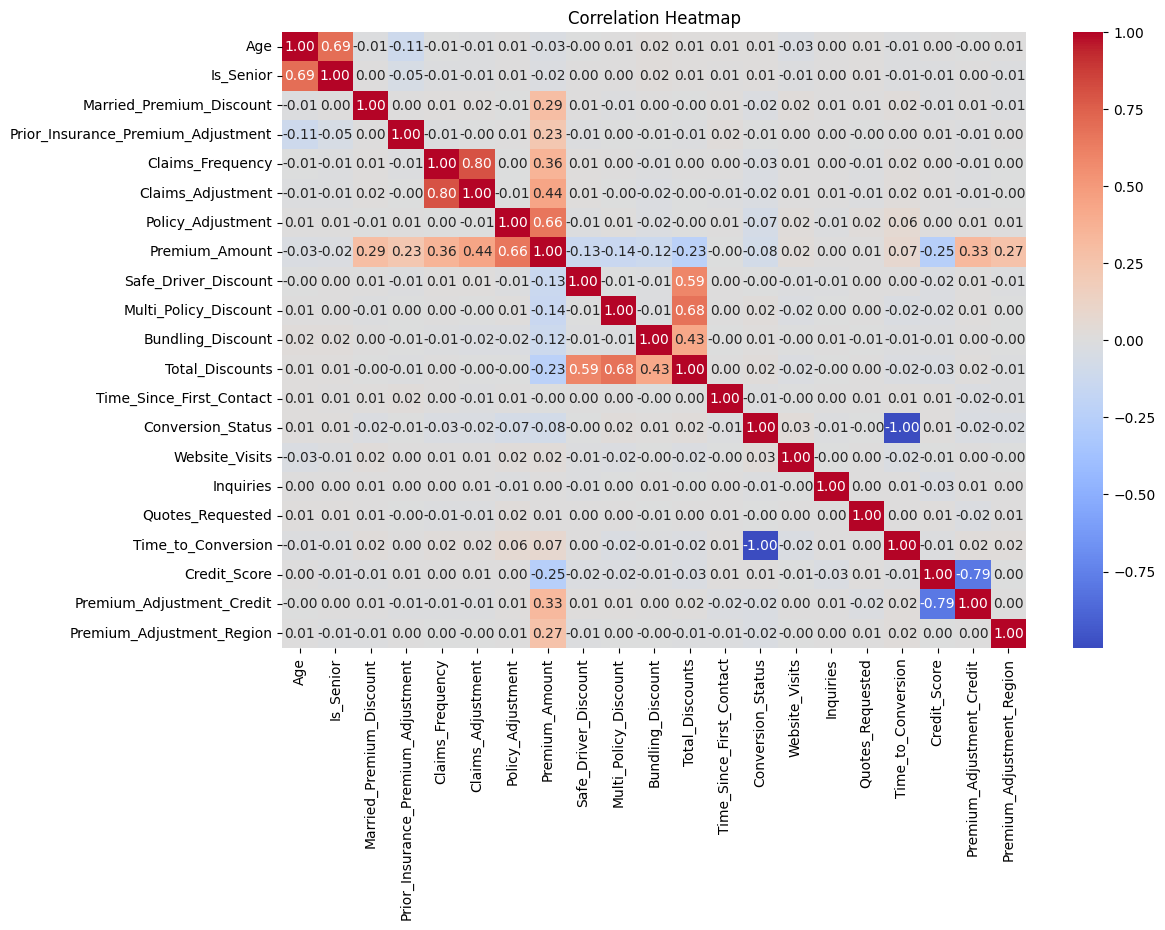

In [138]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

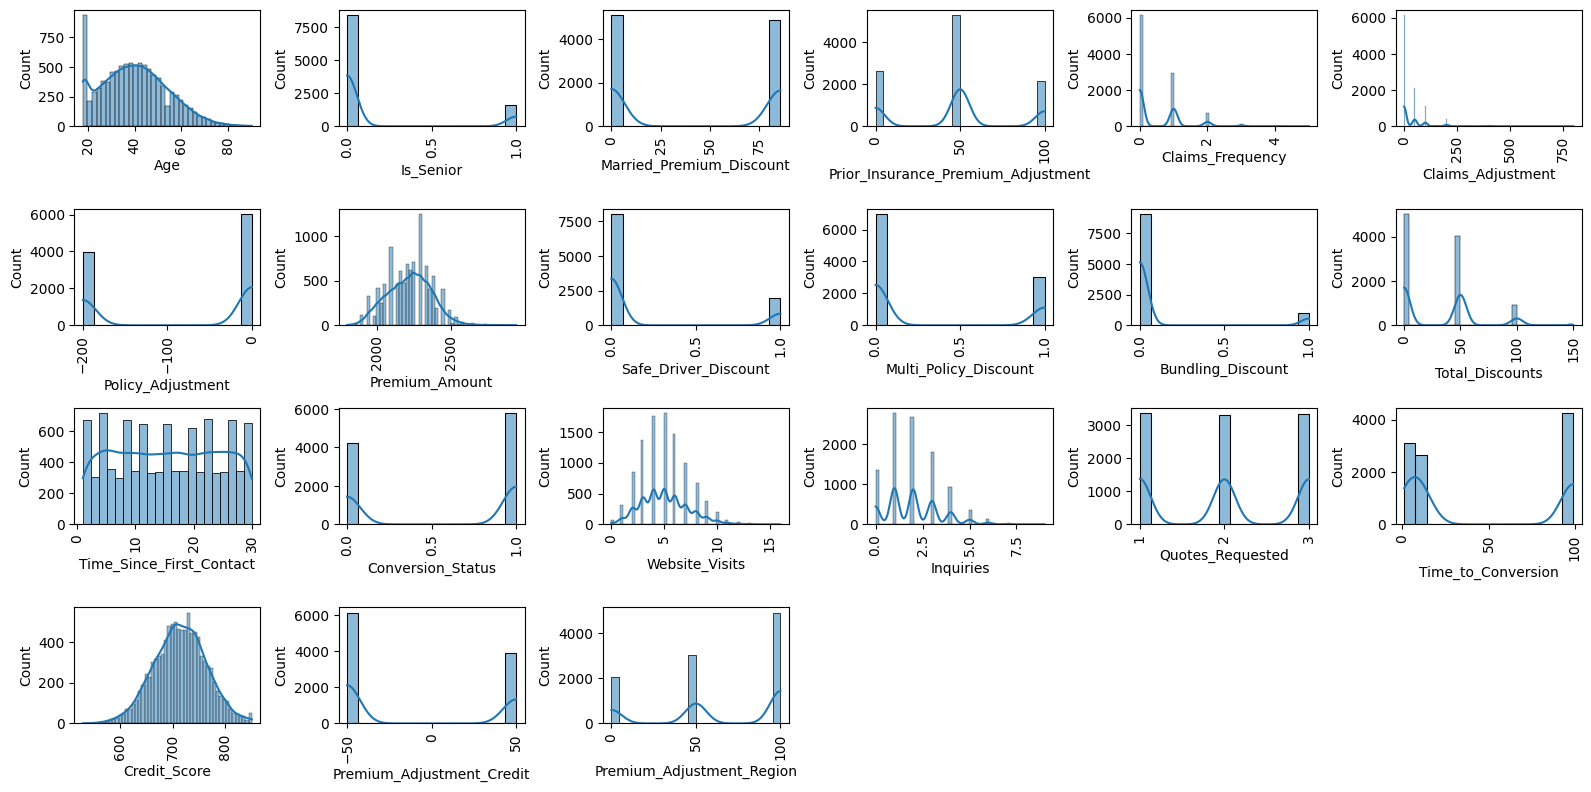

In [139]:
# Memvisualisasikan distribusi variabel numerical
plt.figure(figsize=(16,8))
num_rows = 4
num_cols = 6

for index,column in enumerate(numeric_df):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(data=numeric_df,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

In [140]:
df['Total_Adjustments'] = df['Claims_Adjustment'] + df['Policy_Adjustment'] + df['Premium_Adjustment_Credit'] + df['Premium_Adjustment_Region']

In [141]:
df.head()

,Age,Is_Senior,Married_Premium_Discount,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Adjustment,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,...,Prior_Insurance_<1 year,Prior_Insurance_>5 years,Claims_Severity_Low,Claims_Severity_Medium,Policy_Type_Liability-Only,Source_of_Lead_Online,Source_of_Lead_Referral,Region_Suburban,Region_Urban,Total_Adjustments
0,47,0,86,50,0,0,0,2286,0,0,...,False,False,True,False,False,False,False,True,False,0
1,37,0,86,50,0,0,0,2336,0,0,...,False,False,True,False,False,True,False,False,True,50
2,49,0,86,50,1,50,0,2386,0,0,...,False,False,True,False,False,True,False,False,True,100
3,62,1,86,0,1,50,0,2336,0,0,...,False,True,True,False,False,True,False,False,True,100
4,36,0,0,0,2,100,0,2350,0,0,...,False,True,True,False,False,False,False,True,False,200


In [142]:
X = df.drop(columns=['Conversion_Status', 'Claims_Adjustment', 'Policy_Adjustment', 'Premium_Adjustment_Credit', 'Premium_Adjustment_Region'])
y = df['Conversion_Status']

In [158]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [160]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to the training data and transform
X_test_scaled = scaler.transform(X_test)

In [161]:
# Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42 )
forest_model.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred = forest_model.predict(X_test_scaled)
mse_forest = mean_squared_error(y_test, y_pred)
r2_forest = r2_score(y_test, y_pred)

print("Random Forest Regression:")
print(f"Mean Squared Error: {mse_forest:.4f}")
print(f"R2 Score: {r2_forest:.4f}")

Random Forest Regression:
Mean Squared Error: 0.0019
R2 Score: 0.9925


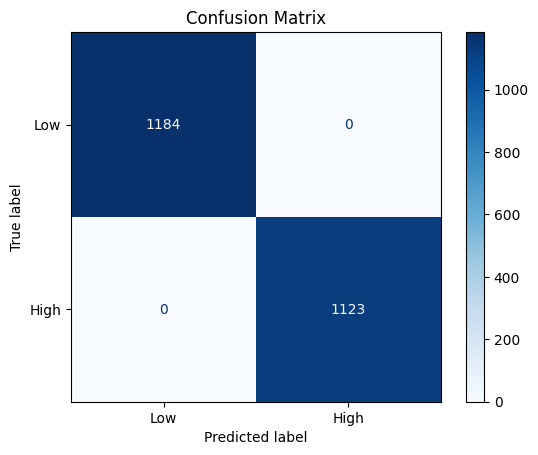

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define bins for converting regression predictions to categories
# Adjusted to create two bins
bins = [-float('inf'), 0.5, float('inf')]  # Values below 0.5 are 'Low', above are 'High'
labels = ['Low', 'High']

# Convert y_test and y_pred into categories
y_test_class = pd.cut(y_test, bins=bins, labels=labels)
y_pred_class = pd.cut(y_pred, bins=bins, labels=labels)

# Create confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()